importing the dependencies


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from google.colab import files
uploaded = files.upload()


Saving Hyderabad_House_Data.csv to Hyderabad_House_Data.csv


importing the data set

In [ ]:
import pandas as pd

df = pd.read_csv("Hyderabad_House_Data.csv",index_col =0)
df.head()


,Bedrooms,Bathrooms,Furnishing,Tennants,Area,Price,Locality
0,3 BHK Builder Floor,2,Furnished,Bachelors/Family,1800 sqft,"34,000","Bhagyalaxmi Nagar, Kavadiguda"
1,3 BHK Apartment,2,Semi-Furnished,Family,2500 sqft,"45,000","Gachibowli, Outer Ring Road"
2,1 BHK Builder Floor,Immediately,Furnished,Bachelors/Family,read more,"18,000",Gachibowli
3,3 BHK Apartment,Immediately,Furnished,Bachelors/Family,2160 sqft,"40,000","Moosapet, NH"
4,3 BHK Apartment,2,Semi-Furnished,Family,1580 sqft,"23,000",Raghavendra Colony kondapur


In [ ]:
import os
os.listdir()


['.config', 'Hyderabad_House_Data.csv', 'sample_data']

In [ ]:
df.shape

(1171, 7)

In [ ]:
df.isnull().sum()

,0
Bedrooms,0
Bathrooms,21
Furnishing,0
Tennants,1
Area,22
Price,0
Locality,0


In [ ]:
df.isnull().values.any()
df.dtypes


,0
Bedrooms,object
Bathrooms,object
Furnishing,object
Tennants,object
Area,object
Price,object
Locality,object


In [ ]:
df.isnull().sum().sum()
df.isnull()

,Bedrooms,Bathrooms,Furnishing,Tennants,Area,Price,Locality
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1166,False,False,False,False,False,False,False
1167,False,False,False,False,False,False,False
1168,False,False,False,False,False,False,False
1169,False,False,False,False,False,False,False


In [ ]:
df.isnull()

,Bedrooms,Bathrooms,Furnishing,Tennants,Area,Price,Locality
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1166,False,False,False,False,False,False,False
1167,False,False,False,False,False,False,False
1168,False,False,False,False,False,False,False
1169,False,False,False,False,False,False,False


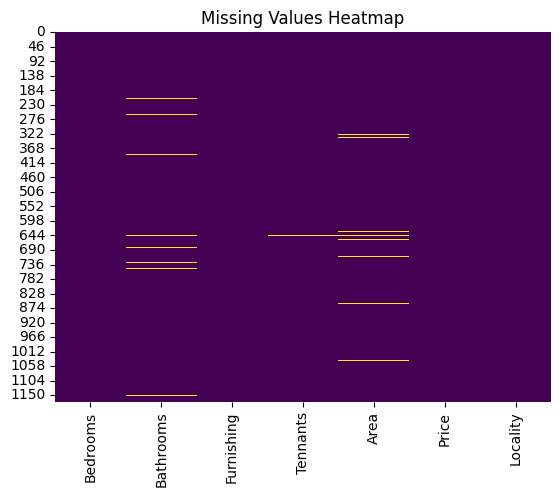

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [ ]:
df.isnull().sum()

,0
Bedrooms,0
Bathrooms,21
Furnishing,0
Tennants,1
Area,22
Price,0
Locality,0


In [ ]:
df.describe()

,Bedrooms,Bathrooms,Furnishing,Tennants,Area,Price,Locality
count,1171,1150,1171,1170,1149,1171,1171
unique,28,21,6,6,285,111,637
top,3 BHK Apartment,2,Semi-Furnished,Bachelors/Family,read more,"15,000",Attapur
freq,479,391,622,694,76,85,22


In [ ]:
df.columns
df.select_dtypes(include='number').head()


""
0
1
2
3
4


In [ ]:
numeric_cols = ['Bedrooms', 'Bathrooms', 'Tennants','Furnishing', 'Locality', 'Area', 'Price','Price_per_sqft']
# Loop through numeric columns to clean and convert
for col in numeric_cols:
    df[col] = df[col].replace('[^0-9.]', '', regex=True)        # remove ₹, commas, text
    df[col] = pd.to_numeric(df[col], errors='coerce')           # convert to float, set invalids to NaN

df[['Area', 'Price']].dtypes
df.fillna(df.mean(), inplace=True)  # or use median, mode based on column type





In [ ]:
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 1171 entries, 0 to 1170
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bedrooms        1171 non-null   float64
 1   Bathrooms       1171 non-null   float64
 2   Furnishing      0 non-null      float64
 3   Tennants        1171 non-null   float64
 4   Area            1171 non-null   float64
 5   Price           1171 non-null   int64  
 6   Locality        0 non-null      float64
 7   Price_per_sqft  1171 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 82.3 KB


In [ ]:
df['Price_per_sqft'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['Price_per_sqft'].fillna(df['Price_per_sqft'].median(), inplace=True)


/tmp/ipython-input-40-4236092352.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price_per_sqft'].replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipython-input-40-4236092352.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [ ]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')


In [ ]:
df['Price_per_sqft'] = df['Price'] / df['Area']


<Figure size 100x100 with 0 Axes>

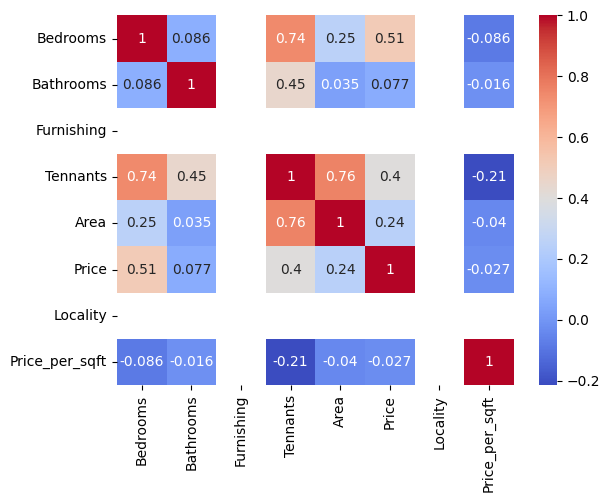

<Figure size 100x100 with 0 Axes>

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot = True , cbar = True , cmap = 'coolwarm')
plt.figure(figsize=(1,1))

In [ ]:
X = df.drop(columns =['Price'], axis=1)
Y = df['Price']
print(X)


      Bedrooms  Bathrooms  Furnishing  Tennants    Area  Locality  \
0          3.0        2.0         NaN       NaN  1800.0       NaN   
1          3.0        2.0         NaN       NaN  2500.0       NaN   
2          1.0        NaN         NaN       NaN     NaN       NaN   
3          3.0        NaN         NaN       NaN  2160.0       NaN   
4          3.0        2.0         NaN       NaN  1580.0       NaN   
...        ...        ...         ...       ...     ...       ...   
1166       2.0        1.0         NaN       NaN   900.0       NaN   
1167       1.0        1.0         NaN       NaN     NaN       NaN   
1168       3.0        1.0         NaN       NaN  1515.0       NaN   
1169       3.0       19.0         NaN       3.0  1500.0       NaN   
1170       2.0        2.0         NaN       NaN  1100.0       NaN   

      Price_per_sqft  
0          18.888889  
1          18.000000  
2                NaN  
3          18.518519  
4          14.556962  
...              ...  
1166      

In [ ]:
print(Y)

0       34000
1       45000
2       18000
3       40000
4       23000
        ...  
1166    15000
1167    10000
1168    14000
1169    16000
1170    12000
Name: Price, Length: 1171, dtype: int64


In [ ]:
X_train , X_test ,  Y_train , Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(1171, 7) (936, 7) (235, 7)
(1171,) (936,) (235,)


In [ ]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1 , max_depth = 2)
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_prediction1 = xgb_model.predict(X_test)
print(y_prediction1)

[11152.177  26236.504  30110.79    9384.282  45278.836  11199.17
  8295.588  37772.74   11152.177  14222.565   5159.1987 28687.455
 17744.064  11256.21   18897.787  21242.566  11152.177  22895.703
 19522.865  14222.565  24639.797  25436.082  17737.797  42570.316
 15314.738  13747.955  17271.99   13517.141  23606.145  22323.225
 15793.657  17037.104  22712.518  11152.177  44632.08   15818.623
 30597.613  12374.835  18742.66   14221.507  24201.025  11152.177
 31004.156  32742.121  36450.53   14581.993  12649.039  25087.47
  8623.711  24355.06   13899.912  45552.1    37563.18   36049.188
 11152.177   8804.484  15323.246  22515.404  24201.025  22918.98
 11152.177  12381.591  21364.77   10751.618  17512.568  21230.64
 15600.339  12798.126  11985.066  17271.99   18066.697  10769.462
 16762.775  47373.6    14337.722  30227.322  12649.039  15602.726
 26836.371  23876.197  13502.492  19678.336  23876.197  37463.82
 22944.053  22999.186  26964.008  41278.668  14843.61    6611.5312
 41785.332  10

In [ ]:
y_prediction2 = xgb_model.predict(X_train)
print(y_prediction2)

[18428.219  16610.928   8726.78   24155.328  24145.5    12649.039
 14889.049  29731.246  45014.453  24072.582  48120.633  26480.342
 31706.64   46032.453  16905.447  39711.992  30320.35   14614.044
 39302.754  38193.13   30552.254  14859.614  22553.943  11152.177
 17839.451  16865.785  14563.94   15923.771  16610.928  20329.824
 47693.082   9732.813  13464.377  32706.268  27640.791  11152.177
 15080.072  15637.954  37159.508  13863.482  41732.195  15215.479
 42851.57   15015.883  38891.9    17737.797  48852.598  13502.492
 20003.896  24355.06   28210.729  17737.797  15818.623  14265.513
 44617.887  31372.53   11152.177  17308.664  11304.219  16527.55
 16733.934  44554.977  38640.133  42599.277  11152.177   8962.16
 23606.145  28856.428  12447.485  39894.56   26836.371  11998.0205
 20003.896  34639.21   27431.23   16610.928  32475.934  30110.79
 29731.246  41929.305  23606.145  23070.617  19715.531  14926.508
 23262.016  24490.2    10518.71   34254.363  34176.035  38558.715
 16873.896  

In [ ]:
from sklearn.metrics import r2_score

r2_train = r2_score(Y_train, y_prediction2)
print("R² Score on Training Data:", r2_train)


R² Score on Training Data: 0.9413446187973022


In [ ]:
r2_test = r2_score(Y_test, y_prediction1)
print("R² Score on Testing Data:", r2_test)

R² Score on Testing Data: 0.924525797367096


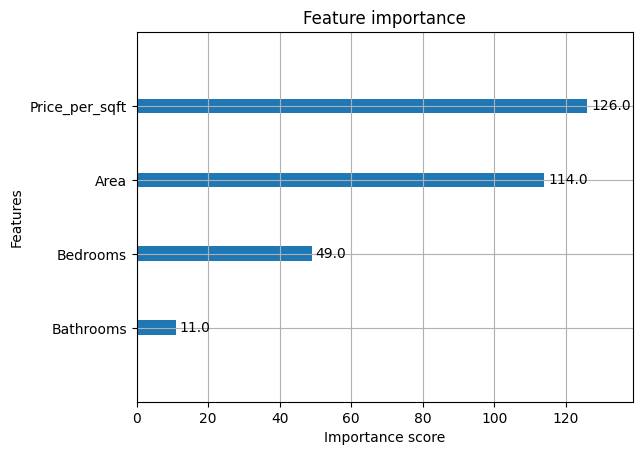

In [ ]:
xgb_model.fit(X_train, Y_train)
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb_model)
plt.show()


In [ ]:
pip install --upgrade scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 89.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.1 which is incompatible.


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("MAE:", mean_absolute_error(Y_test, y_prediction1))


MAE: 1632.299072265625


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(Y_test, y_prediction1)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 2739.5135517095


In [ ]:
import sklearn
print(sklearn.__version__)


1.6.1


In [ ]:

from sklearn.metrics import r2_score

print("R2 Score:", r2_score(Y_test, y_prediction1))


R2 Score: 0.924525797367096


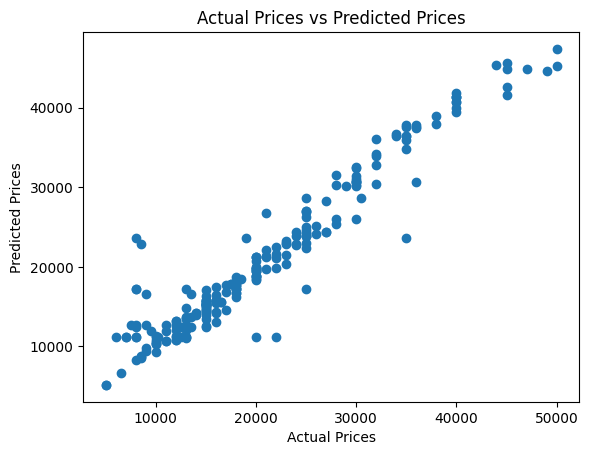

In [ ]:
plt.scatter(Y_test, y_prediction1)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, Y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 6],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1]},
             scoring='r2', verbose=1)

In [ ]:
grid_search.best_params_   # best set of parameters
grid_search.best_score_    # best cross-validation R² score



np.float64(0.9320709347724915)

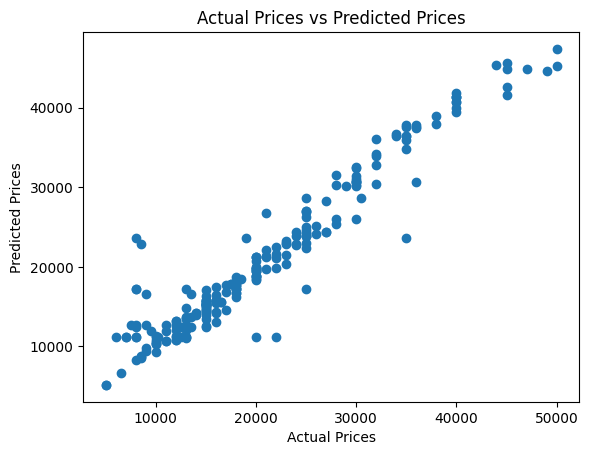

In [ ]:
plt.scatter(Y_test, y_prediction1)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
import joblib

In [ ]:
# If using GridSearchCV
joblib.dump(grid_search.best_estimator_, 'xgboost_model.pkl')


['xgboost_model.pkl']

In [ ]:
# Load the saved model
loaded_model = joblib.load('xgboost_model.pkl')


In [ ]:
import joblib

loaded_model = joblib.load('xgboost_model.pkl')
y_pred = loaded_model.predict(X_test)


In [ ]:
from google.colab import files
files.download("xgboost_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X_train.columns.tolist()


['Bedrooms',
 'Bathrooms',
 'Furnishing',
 'Tennants',
 'Area',
 'Locality',
 'Price_per_sqft']